<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Mean, Standard Deviation, and Finding Outliers

**Math 345M LAB - Week 1**

In this lab we will be performing a basic analysis of a dataset. We will calculate basic statistical qunatities like mean and standart deviation, along with that we will check for outlier data points using two different methods.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [126]:
#Importing dataset

df = pd.read_csv('./Datasets/beers.csv') 

display(df)

# Here are some basic manipulations that one can do using the panda library

# df.head(4) # selects the first 4 rows of the dataset
# df.tail(3) # selects the last 3 rows of the dataset

# ## Read Headers
# print(df.columns)

# ## Read each Column
# print(df['Brand'][0:5])

# ## Read each Row
# print(df.iloc[1:4])

# ## Read a specific location (R,C)
# print(df.iloc[2,2])


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [40]:
# Selecting specific columns out of the dataset (using the header's name)

# dropping beers that have nan value in the column of interest
mydf    = df.dropna(subset=['abv'])
# selecting the data of interest
alcohol = mydf['abv']*100 #to get it in %


volume  = df['ounces']
name    = df['name']

**Histogram**

First of all we are going to construct a histogram of the data. The purpose of a histogram is to graphically summarize the distribution of a univariate data set. A histogram is a simple graphical repesentation of the data that shows the following information:

*   center (i.e., the location) of the data;
*   spread (i.e., the scale) of the data;
*   skewness of the data;
*   presence of outliers;
*   presence of multiple modes in the data.


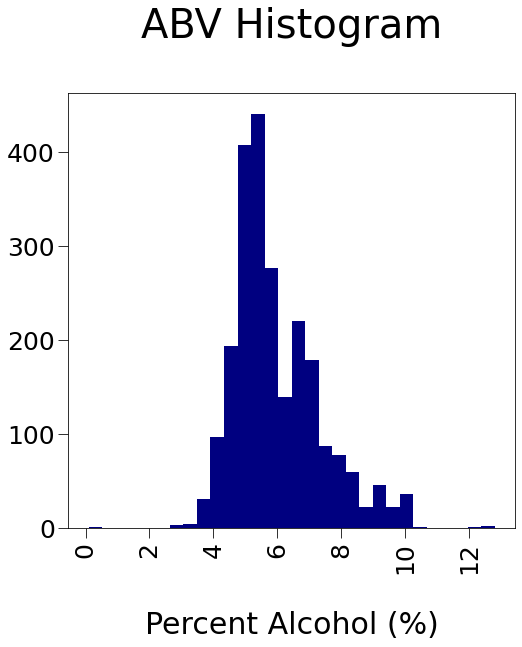

In [41]:
plt.figure(figsize = (8,8))

plt.hist(alcohol, bins = 30, color = 'navy')

plt.title("ABV Histogram\n", fontsize=40)

plt.xlabel("\nPercent Alcohol (%)", fontsize=30)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25, rotation=0)

plt.show()


> **Mean and Standard Deviation**

Given a dataset $X = \{x_1, x_2, ..., x_N\}$, the mean of the dataset is defined as:

$$
\bar{x} = \frac{1}{N}\sum_{i=1}^{N}x_{i}
$$

while the standart deviation is definied as:

$$
s = \sqrt{\frac{\left( \sum x_i - \bar{x} \right)^2}{N-1} }
$$

> ***Outliers***


Outliers are individual values that fall outside of the overall pattern of a data set. This definition is somewhat vague and subjective, so it is helpful to have a rule to apply when determining whether a data point is truly an outlier.
In order to identify the outliers in a dataset we will consider two methods: the *Emperical Rule* and the *Interquartile Rule*.

> **Empirical Rule**

When dealing with a normal distribution (i.e. Gaussian distrbuiton):

$$
P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}
$$

*   About $68\%$ of values fall within $1$ standart deviation from the mean $\mu$.
*   About $95\%$ of values fall within $2$ standart deviation from the mean $\mu$.
*   About $99.7\%$ of values fall within $3$ standart deviation from the mean $\mu$.

You can use the rule when you are told your data is normal, nearly normal, or if you have a unimodal distribution (i.e. one with a single peak) that is symmetric. 


In [65]:
mean = mydf['abv'].mean() # mean of the alcohol percentatge data
std  = mydf['abv'].std()  # standard deviation of the alcohol percentatge data


0.013541733716680264

In [94]:
# finding left side outliers smaller than ( mean - 3 * st dev)
leftOutliers = mydf.loc[mydf['abv'] < mean - 3 * std]['Unnamed: 0']
# finding left side outliers smaller than ( mean + 3 * st dev)
rightOutliers = mydf.loc[mydf['abv'] > mean + 3 * std]['Unnamed: 0']
# combining them together
outlierIdx = leftOutliers.add(rightOutliers, fill_value = 0)

# Outliers
outliers = mydf.loc[outlierIdx]

# Dropping Outliers
cleanData = mydf.drop(outlierIdx)

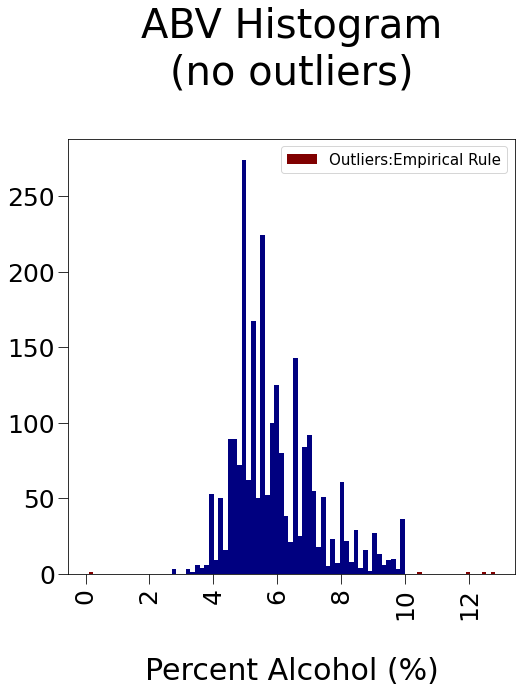

List of ABV outliers using the Empirical Rule:


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
70,70,0.125,80.0,2685,London Balling,English Barleywine,1,16.0
2189,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,17,16.0
2266,2266,0.001,NaN,606,Scotty K NA,Low Alcohol Beer,522,16.0
2278,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),51,19.2
2279,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,51,19.2


In [116]:
# plotting the histogram of data without outliers

plt.figure(figsize = (8,8))

plt.hist(cleanData['abv']*100, bins = 50, color = 'navy')
plt.hist(outliers['abv']*100, bins = 100, color = 'maroon', label = 'Outliers:Empirical Rule')

plt.title("ABV Histogram\n(no outliers)\n", fontsize=40)

plt.legend(fontsize = 15)

plt.xlabel("\nPercent Alcohol (%)", fontsize=30)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25, rotation=0)

plt.show()


# presenting the outliers
print("List of ABV outliers using the Empirical Rule:")
display(outliers)

>**Interquartile Rule**


Any set of data can be described by its five-number summary. These five numbers, which give you the information you need to find patterns and outliers, consist of (in ascending order):

1) $Q_0$ represents the minimum or lowest value of the dataset.

2) $Q_1$ represents a quarter of the way through the list of all data.

3) $Q_2$ represents the median of the data set, i.e. the midpoint of the whole list of data.

4) $Q_3$ represents three-quarters of the way through the list of all data.

5) $Q_4$ represents the maximum or highest value of the data set.

Another useful quantity in a dataset is the *interquratile range* which is defined as:

$$
IQR = Q_3 - Q_1
$$


**Using the Interquartile Rule to Find Outliers**

Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:

*   Calculate the interquartile range for the data.
*   Multiply the interquartile range ($IQR$) by $1.5$
*   Add $1.5 * (IQR)$ to the third quartile. Any number greater than this is a suspected outlier.
*   Subtract $1.5 * (IQR)$ from the first quartile. Any number less than this is a suspected outlier.









In [111]:
# Interquartile Range Rule
Q1,Q3 = np.percentile(sorted(mydf['abv']),[25,75])
IQR = Q3-Q1

# finding outliers based on IQR rule

# finding left side outliers smaller than ( Q1 - 1.5 * IQR)
leftOutliersIQR = mydf.loc[mydf['abv'] < Q1 - (1.5 * IQR)]['Unnamed: 0']
# finding left side outliers smaller than ( Q3 + 1.5 * IQR)
rightOutliersIQR = mydf.loc[mydf['abv'] > Q3 + (1.5 * IQR)]['Unnamed: 0']
# combining them together
outlierIdxIQR = leftOutliersIQR.add(rightOutliersIQR, fill_value = 0)

# Outliers
outliersIQR = mydf.loc[outlierIdxIQR]

# Dropping Outliers
cleanDataIQR = mydf.drop(outlierIdxIQR)

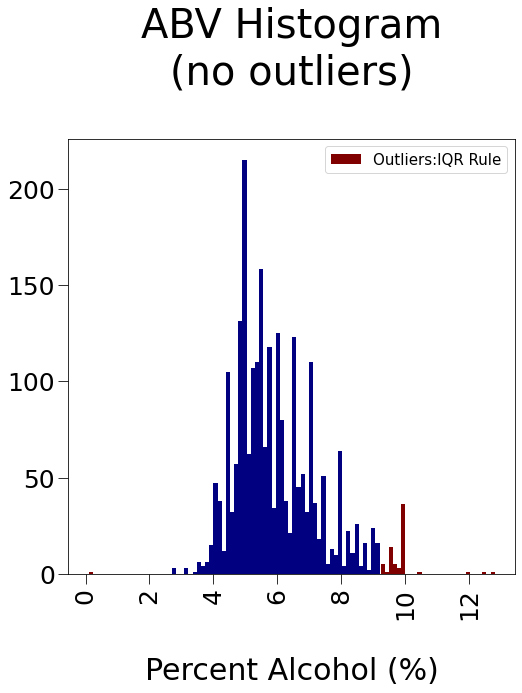

List of ABV outliers using the Empirical Rule:


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
70,70,0.125,80.0,2685,London Balling,English Barleywine,1,16.0
2189,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,17,16.0
2266,2266,0.001,NaN,606,Scotty K NA,Low Alcohol Beer,522,16.0
2278,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),51,19.2
2279,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,51,19.2


In [117]:

# plotting the histogram of data without outliers

plt.figure(figsize = (8,8))

plt.hist(cleanDataIQR['abv']*100, bins = 50, color = 'navy')
plt.hist(outliersIQR['abv']*100, bins = 100, color = 'maroon', label = 'Outliers:IQR Rule')

plt.title("ABV Histogram\n(no outliers)\n", fontsize=40)

plt.legend(fontsize = 15)

plt.xlabel("\nPercent Alcohol (%)", fontsize=30)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25, rotation=0)

plt.show()

# presenting the outliers
print("List of ABV outliers using the IQR Rule:")
display(outliers)

Sources:

https://www.statisticshowto.com/empirical-rule-2/

https://www.statisticshowto.com/how-to-find-a-five-number-summary-in-statistics/

https://www.itl.nist.gov/div898/handbook/eda/section3/histogra.htm